## Midterm

In [96]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# I.a

First, $f$ is continuous on $[-a, a]$. Hence, by Taylor's theorem and the Lagrange form of the remainder, $\exists \xi_+, \xi_- \in ]-h, h[$ for any $0<h<a$ such that
$$
f(h) = f(0)+hf'(0)+\frac{h^2}{2}f''(0)+\frac{h^3}{6}f'''(\xi_+)
$$

Similarly, 
$$
f(-h) = f(0)-hf'(0)+\frac{h^2}{2}f''(0)-\frac{h^3}{6}f'''(\xi_-)
$$

Thus,
$$
f(h)-f(-h) = 2hf'(0)+\frac{h^3}{6}f'''(\xi_+)+\frac{h^3}{6}f'''(\xi_-)
$$

Now, $f'''$ is continuous. By the MVT, $\exists\ \xi \in\ ]\xi_-, \xi_+[\ \subseteq\  ]-h, h[$ such that $\frac{h^3}{6}f'''(\xi_+)+\frac{h^3}{6}f'''(\xi_-) = \frac{h^3}{3}f'''(\xi)$. Thus,
$$
f(h)-f(-h) = 2hf'(0)+\frac{h^3}{3}f'''(\xi)
$$

Substituting this in for the equation of $\tilde{D}_h$, we obtain
$$
\tilde{D}_h = \frac{1}{2h}(2hf'(0)+\frac{h^3}{3}f'''(\xi)+\delta f(h)-\delta f(-h)\\
$$

Rearranging,
$$
\tilde{D}_h-f'(0) = \frac{h^2}{6}f'''(\xi)+\frac{\delta f(h)-\delta f(-h)}{2h}
$$

where $\xi \in ]-h, h[$.

# I.b
First, as $\xi \in ]-a,a[$, we have $f'''(\xi)\leq \max\limits_{x\in]-a,a[}f'''(x)\leq\max\limits_{x\in]-a,a[}|f'''(x)| :=M$. By hypothesis, $|\delta f(x)|\leq\varepsilon$. Applying the triangle inequality twice, we have

\begin{align*}
|\tilde{D}_h-f'(0)| &= \big|\frac{h^2}{6}f'''(\xi)+\frac{\delta f(h)-\delta f(-h)}{2h}\big|\\
&\leq \big|\frac{h^2}{6}f'''(\xi)\big|+\frac{|\delta f(h)|+|\delta f(-h)|}{2h}\\
&\leq \frac{Mh^2}{6}+\frac{\varepsilon}{h}
\end{align*}


To find the minimum of $B(h)=\frac{\varepsilon}{2h}+\frac{Mh^2}{6}$ we differentiate it with respect to $h$.
$$
B'(h) = \frac{-\varepsilon}{-h^2}+\frac{Mh}{3}
$$
Thus, 
$$
h^3 = \frac{3\varepsilon}{M} \implies h = \big(\frac{3\varepsilon}{M}\big)^{1/3}
$$
minimizes $B$, as from the plot, the extremum is a minimum.

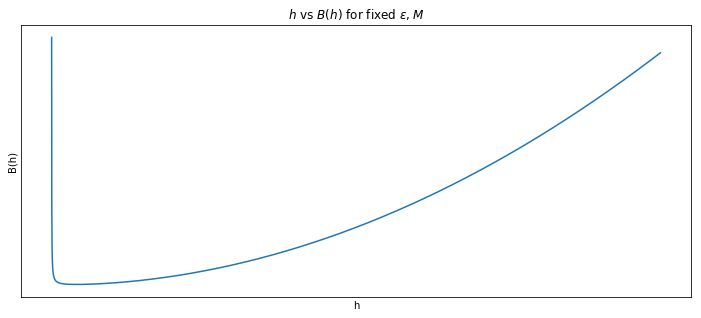

In [90]:
M = 1
h = np.linspace(0.0001, 0.75, 1000000)
epsilon = 0.00001
B = lambda h: epsilon/h + M*h**2 / 6

fig = plt.figure(figsize=(12, 5))
plt.title(r'$h$ vs $B(h)$ for fixed $\varepsilon, M$')
plt.plot(h, B(h))
plt.xlabel("h")
plt.ylabel("B(h)")
plt.xticks([])
plt.yticks([])
plt.show()

For any fixed $\varepsilon$, we have that $\frac{\varepsilon}{h}\rightarrow\infty$ as $h\rightarrow 0+$. Thus, $\lim\limits_{h\rightarrow 0+}B(h) = \infty$. Hence, choosing $h< \big(\frac{3\varepsilon}{M}\big)^{1/3}$ can lead to an error that grows without bounds, with the bound of the error increasing the smaller we let $h$ be beyond that minimum point, leading to a poor approximation of the derivative of $f$.

# II.a
We use the function $f(x)=|x|$.

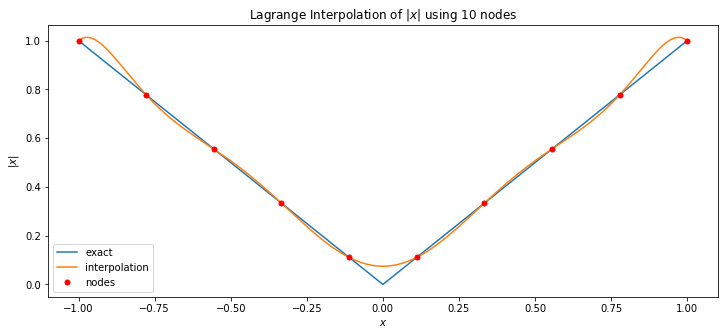

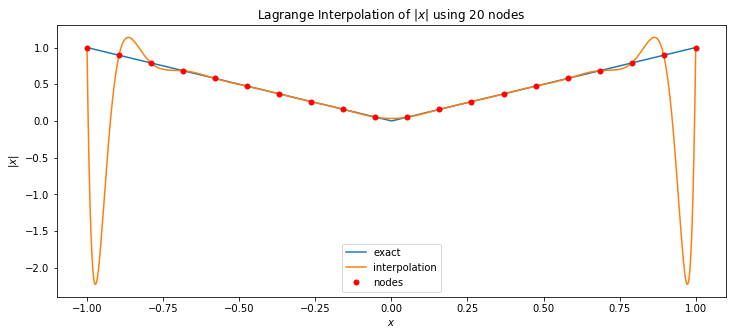

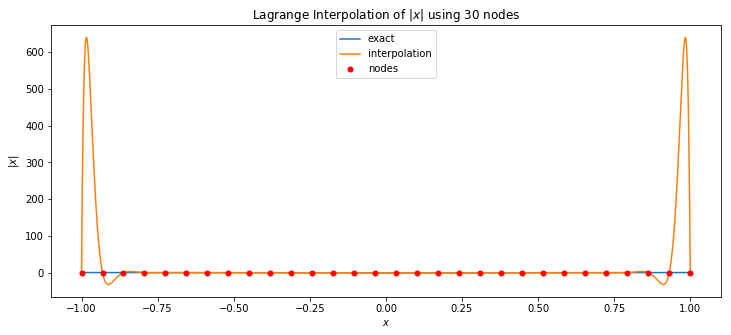

In [83]:
def f(x):
    return (abs(x))
def lagrangeInterpolation(xlist, x):
    n = len(xlist)
    p_n = 0
    for j in range(n):
        w = 1
        x_j = xlist[j]
        y_j = f(x_j)
        for k in range(n):
            if k == j:
                continue
            w *= (((x - xlist[k])/(x_j - xlist[k])))
        p_n += (y_j * w)
    return p_n
x = np.linspace(-1, 1, 10000)

n=10
xlist = np.linspace(-1, 1, n)

fig = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()
n=20
xlist = np.linspace(-1, 1, n)

fig1 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=30
xlist = np.linspace(-1, 1, n)

fig2 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()


The Runge phenomenon is very apparent in the latter two plots, where the interpolation near 0 seem to fit quite well, but the interpolation on the outermost nodes is off by orders of magnitude. 

# II.b
Chebyshev nodes on $]-1, 1[$ are
$$
 x_{k}=\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n
$$

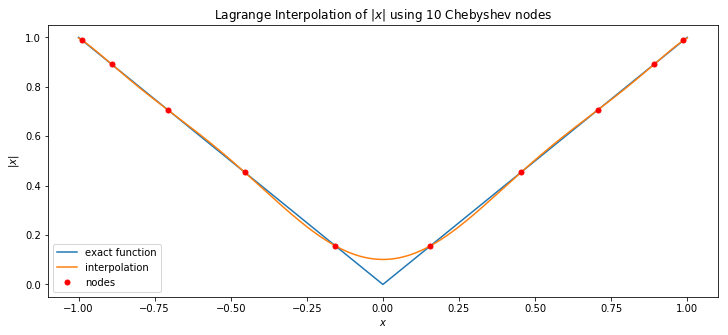

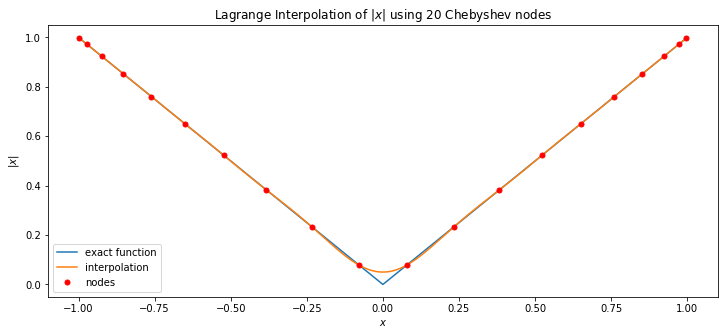

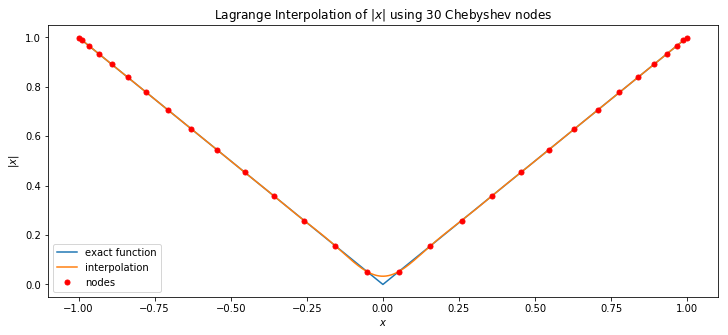

In [127]:
def chebyshevNodes(n):
    return [np.cos(((2*k-1)*np.pi)/(2*n)) for k in range(1, n+1)]
n=10
xlist = chebyshevNodes(n)

fig = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d Chebyshev nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()
n=20
xlist = chebyshevNodes(n)

fig1 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d Chebyshev nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=30
xlist = chebyshevNodes(n)

fig2 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [lagrangeInterpolation(xlist, i) for i in x], label="interpolation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Lagrange Interpolation of $|x|$ using %d Chebyshev nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

# II.c


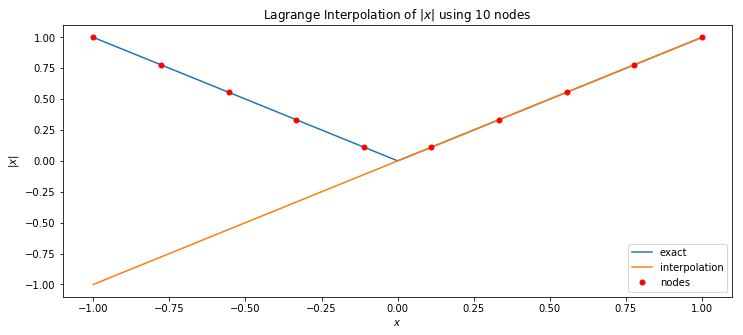

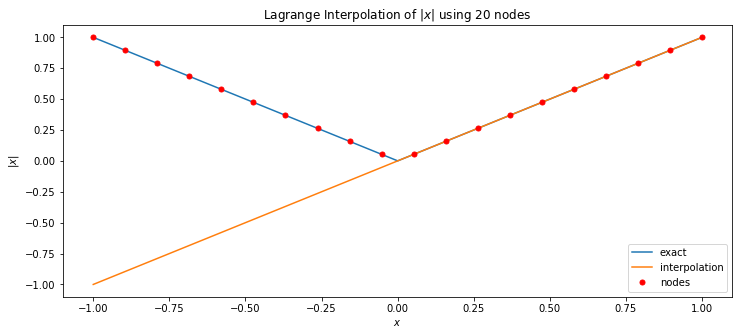

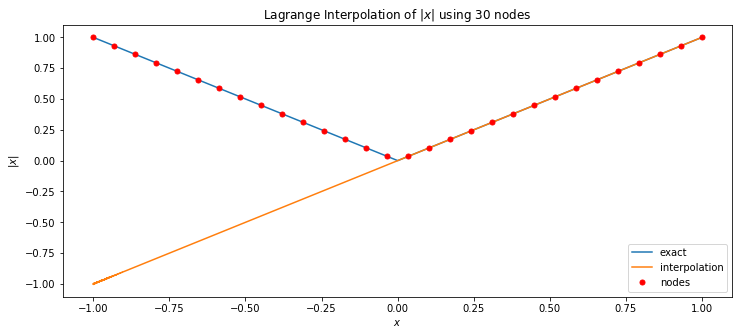

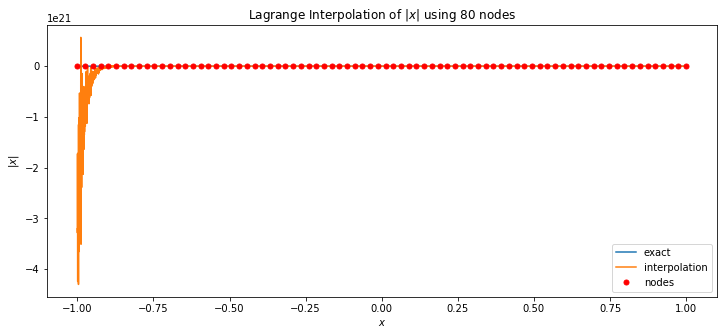

In [125]:
def f(x):
    return (abs(x))
def bernstein(n, x):
    B = 0
    for j in range(0, n+1):
        B += (f(float((j)/n)) * sp.binom(n, j) * x**j * (1 - x)**(n-j))
    return B
n=10
xlist = np.linspace(-1, 1, n)

fig = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()
n=20
xlist = np.linspace(-1, 1, n)

fig1 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)

plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=30
xlist = np.linspace(-1, 1, n)

fig2 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)
plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()

n=80
xlist = np.linspace(-1, 1, n)

fig2 = plt.figure(figsize=(12, 5))
plt.plot(x, f(x), label="exact function")
plt.plot(x, [bernstein(n, i) for i in x], label="approximation")
plt.plot(xlist, [f(i) for i in xlist], 'ro', label="nodes",markersize=5)
plt.title(r'Bernstein Approximation of $|x|$ using %d nodes'%n)
plt.xlabel(r'$x$')
plt.ylabel(r'$|x|$')
plt.legend()
plt.show()